# 1) 사람들은 행복하게 하는것은 무엇일까?

# 행복 기사 스크래핑

In [5]:
import requests

In [6]:
import lxml.html

In [7]:
import csv

In [8]:
url = 'http://news.naver.com/main/search/search.nhn?query=%C7%E0%BA%B9&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=title.basic&ic=all&so=rel.dsc&stDate=range:20160101:20160617&detail=0&pd=4&r_cluster2_start=1&r_cluster2_display=10&start=1&display=5&startDate=2016-01-01&endDate=2016-06-17&page={}'

In [9]:
url

'http://news.naver.com/main/search/search.nhn?query=%C7%E0%BA%B9&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=title.basic&ic=all&so=rel.dsc&stDate=range:20160101:20160617&detail=0&pd=4&r_cluster2_start=1&r_cluster2_display=10&start=1&display=5&startDate=2016-01-01&endDate=2016-06-17&page={}'

In [10]:
with open('happiness.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1,300):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for happiness_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(happiness_link.attrib['href'])   # 네이버 뉴스 링크
                happiness = lxml.html.fromstring(res.text)
                body = happiness.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 문서읽어오기

In [11]:
import csv

In [12]:
happiness = []
with open('happiness.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        happiness.append(row[0])

# 형태소 분석기

In [13]:
from konlpy.tag import Twitter

In [14]:
tagger = Twitter()

# Matrix 만들기

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [17]:
tdf = cv.fit_transform(happiness)

In [18]:
tdf

<1165x50 sparse matrix of type '<class 'numpy.int64'>'
	with 22029 stored elements in Compressed Sparse Row format>

# 단어 목록

In [19]:
words = cv.get_feature_names()

In [20]:
words

['가구',
 '강남구',
 '개발',
 '것',
 '경제',
 '계획',
 '고',
 '곳',
 '교육',
 '그',
 '금지',
 '기자',
 '년',
 '뉴스',
 '도시',
 '등',
 '를',
 '마을',
 '만',
 '명',
 '무단',
 '문화',
 '및',
 '배포',
 '사업',
 '사진',
 '사회',
 '서울',
 '서울시',
 '세',
 '센터',
 '수',
 '시',
 '월',
 '위해',
 '이',
 '일',
 '재',
 '전재',
 '제한',
 '주민',
 '주택',
 '지난',
 '지역',
 '층',
 '통해',
 '한국',
 '행복',
 '행위',
 '회']

# 한 글자 짜리 단어 빼기

In [21]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [22]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [23]:
tdf = cv.fit_transform(happiness)

In [24]:
words = cv.get_feature_names()

In [25]:
words

['가구',
 '가족',
 '강남구',
 '개발',
 '건립',
 '경제',
 '계획',
 '고시',
 '교육',
 '금지',
 '기자',
 '뉴스',
 '뉴시스',
 '단말기',
 '대한',
 '도시',
 '마을',
 '무단',
 '문화',
 '배포',
 '복합',
 '사업',
 '사진',
 '사회',
 '서비스',
 '서울',
 '서울시',
 '센터',
 '수서동',
 '시간',
 '시설',
 '신혼부부',
 '예정',
 '올해',
 '위해',
 '이번',
 '전재',
 '정부',
 '제한',
 '조성',
 '주민',
 '주택',
 '지난',
 '지역',
 '통해',
 '평균',
 '한국',
 '행복',
 '행위',
 '허가']

# 단어별 출현 빈도

In [26]:
import numpy

In [27]:
count_mat = tdf.sum(axis=0)

In [28]:
count_mat

matrix([[ 755,  421,  998,  824,  435,  489,  854,  379,  506,  811, 1162,
          895,  432,  379,  467,  600,  536,  823,  617,  811,  446, 1053,
          687,  683,  388, 1183,  992,  548,  463,  438,  405,  464,  422,
          468,  842,  420,  783,  387,  521,  410,  995, 2276,  479, 1434,
          616,  381,  712, 3252,  506,  444]], dtype=int64)

In [29]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [30]:
count

array([ 755,  421,  998,  824,  435,  489,  854,  379,  506,  811, 1162,
        895,  432,  379,  467,  600,  536,  823,  617,  811,  446, 1053,
        687,  683,  388, 1183,  992,  548,  463,  438,  405,  464,  422,
        468,  842,  420,  783,  387,  521,  410,  995, 2276,  479, 1434,
        616,  381,  712, 3252,  506,  444], dtype=int64)

In [31]:
word_count = list(zip(words, count))

In [32]:
word_count

[('가구', 755),
 ('가족', 421),
 ('강남구', 998),
 ('개발', 824),
 ('건립', 435),
 ('경제', 489),
 ('계획', 854),
 ('고시', 379),
 ('교육', 506),
 ('금지', 811),
 ('기자', 1162),
 ('뉴스', 895),
 ('뉴시스', 432),
 ('단말기', 379),
 ('대한', 467),
 ('도시', 600),
 ('마을', 536),
 ('무단', 823),
 ('문화', 617),
 ('배포', 811),
 ('복합', 446),
 ('사업', 1053),
 ('사진', 687),
 ('사회', 683),
 ('서비스', 388),
 ('서울', 1183),
 ('서울시', 992),
 ('센터', 548),
 ('수서동', 463),
 ('시간', 438),
 ('시설', 405),
 ('신혼부부', 464),
 ('예정', 422),
 ('올해', 468),
 ('위해', 842),
 ('이번', 420),
 ('전재', 783),
 ('정부', 387),
 ('제한', 521),
 ('조성', 410),
 ('주민', 995),
 ('주택', 2276),
 ('지난', 479),
 ('지역', 1434),
 ('통해', 616),
 ('평균', 381),
 ('한국', 712),
 ('행복', 3252),
 ('행위', 506),
 ('허가', 444)]

# 빈도 순 정렬

In [33]:
import operator

In [34]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('행복', 3252),
 ('주택', 2276),
 ('지역', 1434),
 ('서울', 1183),
 ('기자', 1162),
 ('사업', 1053),
 ('강남구', 998),
 ('주민', 995),
 ('서울시', 992),
 ('뉴스', 895),
 ('계획', 854),
 ('위해', 842),
 ('개발', 824),
 ('무단', 823),
 ('금지', 811),
 ('배포', 811),
 ('전재', 783),
 ('가구', 755),
 ('한국', 712),
 ('사진', 687),
 ('사회', 683),
 ('문화', 617),
 ('통해', 616),
 ('도시', 600),
 ('센터', 548),
 ('마을', 536),
 ('제한', 521),
 ('교육', 506),
 ('행위', 506),
 ('경제', 489),
 ('지난', 479),
 ('올해', 468),
 ('대한', 467),
 ('신혼부부', 464),
 ('수서동', 463),
 ('복합', 446),
 ('허가', 444),
 ('시간', 438),
 ('건립', 435),
 ('뉴시스', 432),
 ('예정', 422),
 ('가족', 421),
 ('이번', 420),
 ('조성', 410),
 ('시설', 405),
 ('서비스', 388),
 ('정부', 387),
 ('평균', 381),
 ('고시', 379),
 ('단말기', 379)]

# 워드 클라우드

In [35]:
%matplotlib inline

In [36]:
from wordcloud import WordCloud

In [37]:
from matplotlib import pyplot

In [38]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

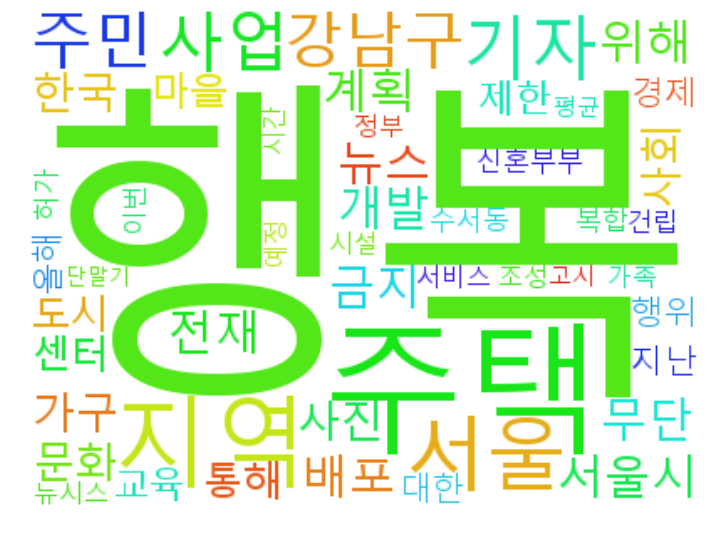

In [39]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [40]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [41]:
word_corr

array([[ 1.        , -0.03967162,  0.22886972, ...,  0.47512567,
         0.18643766,  0.1842664 ],
       [-0.03967162,  1.        , -0.08880434, ..., -0.07902982,
        -0.08506694, -0.08521434],
       [ 0.22886972, -0.08880434,  1.        , ...,  0.31640895,
         0.85464923,  0.84789314],
       ..., 
       [ 0.47512567, -0.07902982,  0.31640895, ...,  1.        ,
         0.25942945,  0.25494999],
       [ 0.18643766, -0.08506694,  0.85464923, ...,  0.25942945,
         1.        ,  0.9878524 ],
       [ 0.1842664 , -0.08521434,  0.84789314, ...,  0.25494999,
         0.9878524 ,  1.        ]])

# 단어 선별(30개)

In [42]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

상관계수 높은 순으로 정렬

In [43]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [65]:
edges = edges[:77]

In [66]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 시각화

In [67]:
import networkx

In [68]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

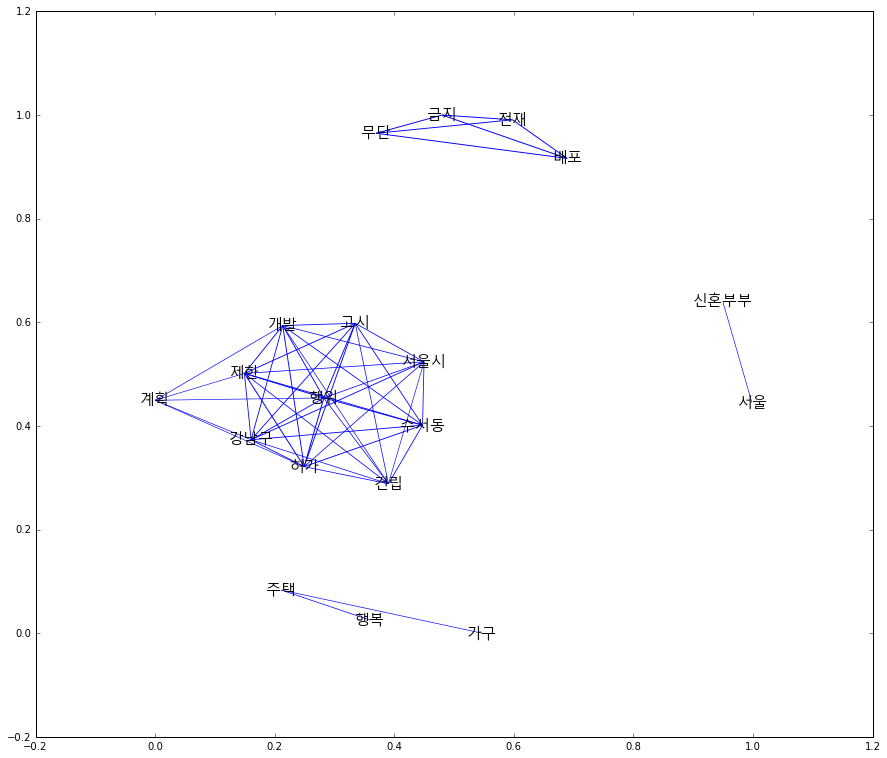

In [72]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(15, 13))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='blue')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.show()

# 결론

# 분석에 의해 사람들의 행복지수를 3개로 나눌 수 있다.

# 첫째, 집을 구입했을 때 (주택 및 가구 군집 )

# 둘째, 신호의 때 (신혼 군집 )

# 셋째, 집이 재개발되었을 때 (개발계획 군집)

# 사람들은 '사랑하는 사람과 좋은 집에서 살때' 가장 행복을 많이 느낀다.